#### Q1) Import required libraries and read the dataset.

## Import the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the Dataset

In [3]:
app_data=pd.read_csv('Apps_data+(1).csv')
app_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Explore the Dataset

#### Q2) Check the first few samples, shape, info of the data and try to familiarize yourself with different features

In [3]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
app_data.shape

(10841, 13)

In [4]:
percent_missing=round((app_data.isnull().sum()/len(app_data))*100,3)
percent_missing

App                0.000
Category           0.000
Rating            13.597
Reviews            0.000
Size               0.000
Installs           0.000
Type               0.009
Price              0.000
Content Rating     0.009
Genres             0.000
Last Updated       0.000
Current Ver        0.074
Android Ver        0.028
dtype: float64

In [5]:
app_data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

#### Q3) Check summary statistics of the dataset. List out the columns that need to be worked upon for model building

In [7]:
app_data.describe(include='O').transpose()

,count,unique,top,freq
App,10841,9660,ROBLOX,9
Category,10841,34,FAMILY,1972
Reviews,10841,6002,0,596
Size,10841,462,Varies with device,1695
Installs,10841,22,"1,000,000+",1579
Type,10840,3,Free,10039
Price,10841,93,0,10040
Content Rating,10840,6,Everyone,8714
Genres,10841,120,Tools,842
Last Updated,10841,1378,"August 3, 2018",326


In [8]:
app_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


- There is only 1 column of float64 data-type ie "Rating"
- Other 12 columns are of object data-type

In [9]:
app_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [10]:
app_data['Installs'].describe()

count          10841
unique            22
top       1,000,000+
freq            1579
Name: Installs, dtype: object

- Columns that are needed to be worked upon for Data Modelling are:
    - Type
    - Installs
    - Genres
 
because If Genres are liked by the audience, they would like to pay for services which may increase Installations!  

#### Q4) Check if there are any duplicate records in the dataset? if any drop them

In [6]:
app_data.duplicated().sum()

483

In [67]:
app_data.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [7]:
app_data.drop_duplicates(inplace=True)

In [8]:
app_data.duplicated().sum()

0

#### Q5) Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them

In [9]:
app_data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [16]:
app_data['Category'].describe()

count      10358
unique        34
top       FAMILY
freq        1943
Name: Category, dtype: object

In [10]:
app_data=app_data[app_data['Category']!='1.9']
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  object 
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [11]:
app_data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

- '1.9' is an invalid category in the 'Category' column. So I dropped the row

#### Q6) Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [73]:
app_data['Rating'].isnull().sum()

1465

In [74]:
app_data['Rating'].notnull().sum()

8892

In [12]:
app_data.dropna(subset=['Rating'],inplace=True)

In [13]:
app_data['Rating'].isnull().sum()

0

In [77]:
app_data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [14]:
app_data['Rating Category']=np.where(app_data['Rating']>3.5,"High","Low")
app_data['Rating Category']

0        High
1        High
2        High
3        High
4        High
         ... 
10834    High
10836    High
10837    High
10839    High
10840    High
Name: Rating Category, Length: 8892, dtype: object

In [15]:
app_data=app_data.iloc[:,[0,1,2,13,3,4,5,6,7,8,9,10,11,12]]
app_data.head(3)

,App,Category,Rating,Rating Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,High,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,High,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,High,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


#### Q7) Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [16]:
import seaborn as sns

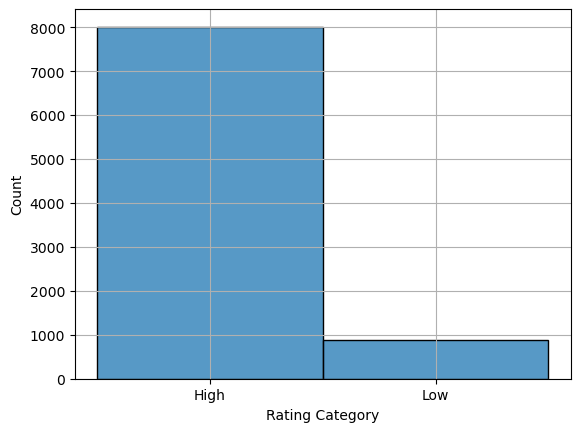

In [17]:
sns.histplot(data=app_data['Rating Category'])
plt.grid(True)
plt.show()

- From the above distribution of column 'Rating Category', we can say that
    - Most people are giving 'High Rating'
    - Low Rating are <1000

#### Q8) Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)


In [18]:
app_data['Reviews'].info()

<class 'pandas.core.series.Series'>
Int64Index: 8892 entries, 0 to 10840
Series name: Reviews
Non-Null Count  Dtype 
--------------  ----- 
8892 non-null   object
dtypes: object(1)
memory usage: 138.9+ KB


In [19]:
app_data['Reviews']=pd.to_numeric(app_data['Reviews'])
app_data['Reviews'].info()

<class 'pandas.core.series.Series'>
Int64Index: 8892 entries, 0 to 10840
Series name: Reviews
Non-Null Count  Dtype
--------------  -----
8892 non-null   int64
dtypes: int64(1)
memory usage: 138.9 KB


In [20]:
app_data['Reviews'].describe()

count    8.892000e+03
mean     4.727764e+05
std      2.905052e+06
min      1.000000e+00
25%      1.640000e+02
50%      4.714500e+03
75%      7.126675e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [21]:
app_data['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 8892, dtype: int64

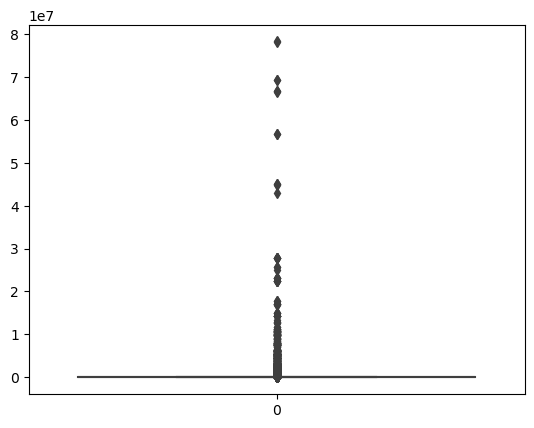

In [22]:
sns.boxplot(data=app_data['Reviews'])
plt.show()

#### Q9)  The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')


In [23]:
app_data[app_data['Size']=='Varies with device']['Size']

37       Varies with device
42       Varies with device
52       Varies with device
67       Varies with device
68       Varies with device
                ...        
10713    Varies with device
10725    Varies with device
10765    Varies with device
10826    Varies with device
10839    Varies with device
Name: Size, Length: 1468, dtype: object

In [25]:
app_data['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 8892, dtype: object

In [26]:
app_data=app_data[app_data['Size']!='Varies with device']
app_data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', '9.4M', '15M', '10M', '1.2M', '26M', '8.0M', '7.9M',
       '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M', '8.6M', '2.4M',
       '27M', '2.5M', '7.0M', '16M', '3.4M', '8.9M', '3.9M', '2.9M',
       '38M', '32M', '5.4M', '18M', '1.1M', '2.2M', '4.5M', '9.8M', '52M',
       '9.0M', '6.7M', '30M', '2.6M', '7.1M', '22M', '6.4M', '3.2M',
       '8.2M', '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M',
       '3.5M', '4.0M', '2.3M', '2.1M', '42M', '9.1M', '55M', '23k',
       '7.3M', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '3.7M', '118k', '44M', '695k',
       '1.6M', '6.2M', '53M', '1.4M', '3.0M', '7.2M', '5.8M', '3.8

In [27]:
len(app_data.Size)

7424

In [87]:
app_data.Size

0         19M
1         14M
2        8.7M
3         25M
4        2.8M
         ... 
10833    619k
10834    2.6M
10836     53M
10837    3.6M
10840     19M
Name: Size, Length: 7424, dtype: object

In [28]:
def val_replace_k(x):
    if type(x)==str:
        if 'k' in x:
            x=x.replace('k','1000')
        return x    
    else:
        return x

In [29]:
app_data['Size']=app_data['Size'].apply(val_replace_k)

In [30]:
app_data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', '9.4M', '15M', '10M', '1.2M', '26M', '8.0M', '7.9M',
       '56M', '57M', '35M', '54M', '2011000', '3.6M', '5.7M', '8.6M',
       '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M', '8.9M', '3.9M',
       '2.9M', '38M', '32M', '5.4M', '18M', '1.1M', '2.2M', '4.5M',
       '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M', '7.1M', '22M',
       '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M', '5.9M', '13M',
       '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M', '42M', '9.1M',
       '55M', '231000', '7.3M', '6.5M', '1.5M', '7.5M', '51M', '41M',
       '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '791000', '8.4M',
       '3.7M', '1181000', '44M', '6951000', '1.6M', '6.2M', '53M', '1.4M',
       '3.0M'

In [31]:
def val_replace_M(x):
    if type(x)==str:
        if 'M' in x:
            x=x.replace('M','1000000')
        return x    
    else:
        return x

In [32]:
app_data['Size']=app_data['Size'].apply(val_replace_M)

In [34]:
app_data['Size'].unique()

array(['191000000', '141000000', '8.71000000', '251000000', '2.81000000',
       '5.61000000', '291000000', '331000000', '3.11000000', '281000000',
       '121000000', '201000000', '211000000', '371000000', '2.71000000',
       '5.51000000', '171000000', '391000000', '311000000', '4.21000000',
       '231000000', '6.01000000', '6.11000000', '4.61000000',
       '9.21000000', '5.21000000', '111000000', '241000000', '9.41000000',
       '151000000', '101000000', '1.21000000', '261000000', '8.01000000',
       '7.91000000', '561000000', '571000000', '351000000', '541000000',
       '2011000', '3.61000000', '5.71000000', '8.61000000', '2.41000000',
       '271000000', '2.51000000', '7.01000000', '161000000', '3.41000000',
       '8.91000000', '3.91000000', '2.91000000', '381000000', '321000000',
       '5.41000000', '181000000', '1.11000000', '2.21000000',
       '4.51000000', '9.81000000', '521000000', '9.01000000',
       '6.71000000', '301000000', '2.61000000', '7.11000000', '221000000'

In [39]:
def casting(x):
    if type(x)==str:
        x=float(x)
        return x
    else:
        return x

In [55]:
app_data['Size']=app_data['Size'].apply(int_casting)

In [56]:
app_data['Size'].unique()

array([1.910e+08, 1.410e+08, 8.710e+00, 2.510e+08, 2.810e+00, 5.610e+00,
       2.910e+08, 3.310e+08, 3.110e+00, 2.810e+08, 1.210e+08, 2.010e+08,
       2.110e+08, 3.710e+08, 2.710e+00, 5.510e+00, 1.710e+08, 3.910e+08,
       3.110e+08, 4.210e+00, 2.310e+08, 6.010e+00, 6.110e+00, 4.610e+00,
       9.210e+00, 5.210e+00, 1.110e+08, 2.410e+08, 9.410e+00, 1.510e+08,
       1.010e+08, 1.210e+00, 2.610e+08, 8.010e+00, 7.910e+00, 5.610e+08,
       5.710e+08, 3.510e+08, 5.410e+08, 2.011e+06, 3.610e+00, 5.710e+00,
       8.610e+00, 2.410e+00, 2.710e+08, 2.510e+00, 7.010e+00, 1.610e+08,
       3.410e+00, 8.910e+00, 3.910e+00, 2.910e+00, 3.810e+08, 3.210e+08,
       5.410e+00, 1.810e+08, 1.110e+00, 2.210e+00, 4.510e+00, 9.810e+00,
       5.210e+08, 9.010e+00, 6.710e+00, 3.010e+08, 2.610e+00, 7.110e+00,
       2.210e+08, 6.410e+00, 3.210e+00, 8.210e+00, 4.910e+00, 9.510e+00,
       5.010e+00, 5.910e+00, 1.310e+08, 7.310e+08, 6.810e+00, 3.510e+00,
       4.010e+00, 2.310e+00, 2.110e+00, 4.210e+08, 

In [57]:
app_data['Size'].info()

<class 'pandas.core.series.Series'>
Int64Index: 7424 entries, 0 to 10840
Series name: Size
Non-Null Count  Dtype  
--------------  -----  
7424 non-null   float64
dtypes: float64(1)
memory usage: 116.0 KB


In [43]:
app_data.head(3)

,App,Category,Rating,Rating Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,High,159,1.910000e+08,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,High,967,1.410000e+08,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,High,87510,8.710000e+00,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


#### Q10)  Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [44]:
app_data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [48]:
def remove_special_char(x):
    if type(x)==str:
        if '+' in x:
            x=x.replace("+","")
        return x
    else:
        return x

In [49]:
app_data['Installs']=app_data['Installs'].apply(remove_special_char)

In [50]:
app_data['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000', '500000000',
       '100', '500', '10', '1000000000', '5', '50', '1'], dtype=object)

In [64]:
def float_casting(x):
    if type(x)==str:
        x=float(x)
        return x
    else:
        return x

In [52]:
app_data['Installs']=app_data['Installs'].apply(int_casting)

In [53]:
app_data['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
             1000,  500000000,        100,        500,         10,
       1000000000,          5,         50,          1], dtype=int64)

In [58]:
app_data['Installs'].info()

<class 'pandas.core.series.Series'>
Int64Index: 7424 entries, 0 to 10840
Series name: Installs
Non-Null Count  Dtype
--------------  -----
7424 non-null   int64
dtypes: int64(1)
memory usage: 116.0 KB


#### Q11) Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [59]:
app_data['Price'].info()

<class 'pandas.core.series.Series'>
Int64Index: 7424 entries, 0 to 10840
Series name: Price
Non-Null Count  Dtype 
--------------  ----- 
7424 non-null   object
dtypes: object(1)
memory usage: 116.0+ KB


In [60]:
app_data['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [61]:
def remove_special_char(x):
    if type(x)==str:
        if '$' in x:
            x=x.replace("$","")
        return x
    else:
        return x

In [62]:
app_data['Price']=app_data['Price'].apply(remove_special_char)

In [65]:
app_data['Price'].unique()

array(['0', '4.99', '6.99', '7.99', '3.99', '5.99', '2.99', '1.99',
       '9.99', '0.99', '9.00', '5.49', '10.00', '24.99', '11.99', '79.99',
       '16.99', '14.99', '29.99', '12.99', '3.49', '10.99', '7.49',
       '1.50', '19.99', '15.99', '33.99', '39.99', '2.49', '4.49', '1.70',
       '1.49', '3.88', '399.99', '17.99', '400.00', '3.02', '1.76',
       '4.84', '4.77', '1.61', '1.59', '6.49', '1.29', '299.99', '379.99',
       '37.99', '18.99', '389.99', '8.49', '1.75', '14.00', '2.00',
       '3.08', '2.59', '19.40', '15.46', '8.99', '3.04', '13.99', '4.29',
       '3.28', '4.60', '1.00', '2.90', '1.97', '2.56', '1.20'],
      dtype=object)

In [66]:
app_data['Price']=app_data['Price'].apply(float_casting)

In [67]:
app_data['Price'].unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

In [68]:
app_data['Price'].info()

<class 'pandas.core.series.Series'>
Int64Index: 7424 entries, 0 to 10840
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
7424 non-null   float64
dtypes: float64(1)
memory usage: 116.0 KB


#### Q12) Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new    feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)


In [69]:
app_data.head()

,App,Category,Rating,Rating Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,High,159,1.910000e+08,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,High,967,1.410000e+08,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,High,87510,8.710000e+00,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,High,215644,2.510000e+08,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,High,967,2.810000e+00,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [70]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              7424 non-null   object 
 1   Category         7424 non-null   object 
 2   Rating           7424 non-null   float64
 3   Rating Category  7424 non-null   object 
 4   Reviews          7424 non-null   int64  
 5   Size             7424 non-null   float64
 6   Installs         7424 non-null   int64  
 7   Type             7424 non-null   object 
 8   Price            7424 non-null   float64
 9   Content Rating   7424 non-null   object 
 10  Genres           7424 non-null   object 
 11  Last Updated     7424 non-null   object 
 12  Current Ver      7420 non-null   object 
 13  Android Ver      7422 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 870.0+ KB


In [ ]:
app_data=app_data.drop(['App','Android Ver','Current Ver','Last Updated','Rating','Genres'],axis=1)

In [79]:
app_data

,Category,Rating Category,Reviews,Size,Installs,Type,Price,Content Rating
0,ART_AND_DESIGN,High,159,1.910000e+08,10000,Free,0.0,Everyone
1,ART_AND_DESIGN,High,967,1.410000e+08,500000,Free,0.0,Everyone
2,ART_AND_DESIGN,High,87510,8.710000e+00,5000000,Free,0.0,Everyone
3,ART_AND_DESIGN,High,215644,2.510000e+08,50000000,Free,0.0,Teen
4,ART_AND_DESIGN,High,967,2.810000e+00,100000,Free,0.0,Everyone
...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,High,44,6.191000e+06,1000,Free,0.0,Everyone
10834,FAMILY,High,7,2.610000e+00,500,Free,0.0,Everyone
10836,FAMILY,High,38,5.310000e+08,5000,Free,0.0,Everyone
10837,FAMILY,High,4,3.610000e+00,100,Free,0.0,Everyone


#### Q13)  Encode the categorical columns

In [81]:
app_data.describe(include='O').transpose()

,count,unique,top,freq
Category,7424,33,FAMILY,1591
Rating Category,7424,2,High,6599
Type,7424,2,Free,6877
Content Rating,7424,6,Everyone,5958


In [89]:
app_data.groupby('Category')['Installs'].sum().sort_values(ascending=False)

Category
GAME                   26802452717
FAMILY                  6696862580
TOOLS                   3526053500
COMMUNICATION           3336915530
NEWS_AND_MAGAZINES      3214900550
PRODUCTIVITY            2711302080
PHOTOGRAPHY             2390893130
SHOPPING                1312731540
SPORTS                  1062411465
PERSONALIZATION          997142930
VIDEO_PLAYERS            891762200
HEALTH_AND_FITNESS       803456220
SOCIAL                   794240475
ENTERTAINMENT            748960000
BUSINESS                 491782920
LIFESTYLE                435519120
FINANCE                  316587300
TRAVEL_AND_LOCAL         260638300
EDUCATION                208202000
MAPS_AND_NAVIGATION      175015560
FOOD_AND_DRINK           171567750
WEATHER                  139296500
BOOKS_AND_REFERENCE      134784155
DATING                   105192410
ART_AND_DESIGN            99233100
LIBRARIES_AND_DEMO        60983000
HOUSE_AND_HOME            51482000
AUTO_AND_VEHICLES         43769800
MEDICAL    

In [93]:
app_data.groupby('Category')['Type'].value_counts()

Category             Type
ART_AND_DESIGN       Free      56
                     Paid       3
AUTO_AND_VEHICLES    Free      63
BEAUTY               Free      37
BOOKS_AND_REFERENCE  Free     136
                     Paid       7
BUSINESS             Free     217
                     Paid       8
COMICS               Free      49
COMMUNICATION        Free     188
                     Paid      18
DATING               Free     139
                     Paid       2
EDUCATION            Free      91
                     Paid       4
ENTERTAINMENT        Free      66
                     Paid       1
EVENTS               Free      38
FAMILY               Free    1444
                     Paid     147
FINANCE              Free     250
                     Paid      13
FOOD_AND_DRINK       Free      81
                     Paid       1
GAME                 Free     884
                     Paid      75
HEALTH_AND_FITNESS   Free     191
                     Paid       8
HOUSE_AND_HOME       F

- Apps that fall under 'Family' and 'GAME' category are very much installed from Play Store
- Apps that fall under 'Beauty' and 'Events' category are least installed from Play Store
- There are more free 'Family' category apps than 'Beauty' category apps